In [132]:
import matplotlib.pyplot as plt
import torchvision
from pathlib import Path
import torch

from torch import nn
from torchvision import transforms
from scripts import data_setup, engine
import torchinfo

In [133]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [134]:
data_path = Path("data/")
image_path = data_path / "soil_low_med_high"

In [135]:
# Get a set of pretrained model weights
weights = torchvision.models.GoogLeNet_Weights.DEFAULT
weights
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [136]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

In [137]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=4)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x14c8a955fd0>,
 ['high', 'low', 'medium'])

In [138]:
model = torchvision.models.googlenet(weights=weights).to(device)

In [139]:
# # Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.fc.parameters():
    param.requires_grad = False

In [140]:
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True), 
    nn.Linear(in_features=25088, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [141]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [142]:

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=18,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  6%|▌         | 1/18 [00:34<09:40, 34.16s/it]

Epoch: 1 | train_loss: 7.2142 | train_acc: 0.0114 | test_loss: 6.9692 | test_acc: 0.0000


 11%|█         | 2/18 [01:11<09:39, 36.23s/it]

Epoch: 2 | train_loss: 5.1436 | train_acc: 0.2614 | test_loss: 5.8766 | test_acc: 0.1667


 17%|█▋        | 3/18 [01:50<09:19, 37.31s/it]

Epoch: 3 | train_loss: 3.7299 | train_acc: 0.6250 | test_loss: 4.8644 | test_acc: 0.2917


 22%|██▏       | 4/18 [02:28<08:45, 37.56s/it]

Epoch: 4 | train_loss: 2.8219 | train_acc: 0.7386 | test_loss: 3.9570 | test_acc: 0.3750


 28%|██▊       | 5/18 [03:05<08:06, 37.45s/it]

Epoch: 5 | train_loss: 2.2635 | train_acc: 0.7727 | test_loss: 3.0911 | test_acc: 0.7083


 33%|███▎      | 6/18 [03:44<07:36, 38.08s/it]

Epoch: 6 | train_loss: 1.2895 | train_acc: 0.9091 | test_loss: 2.7240 | test_acc: 0.7500


 39%|███▉      | 7/18 [04:22<06:56, 37.87s/it]

Epoch: 7 | train_loss: 1.5014 | train_acc: 0.8295 | test_loss: 2.4859 | test_acc: 0.7500


 44%|████▍     | 8/18 [04:59<06:17, 37.77s/it]

Epoch: 8 | train_loss: 1.0360 | train_acc: 0.8750 | test_loss: 1.8319 | test_acc: 0.7500


 50%|█████     | 9/18 [05:38<05:41, 37.98s/it]

Epoch: 9 | train_loss: 0.6135 | train_acc: 0.9432 | test_loss: 1.5524 | test_acc: 0.8333


 56%|█████▌    | 10/18 [06:16<05:03, 37.97s/it]

Epoch: 10 | train_loss: 0.7502 | train_acc: 0.8977 | test_loss: 1.5762 | test_acc: 0.8333


 61%|██████    | 11/18 [06:55<04:27, 38.21s/it]

Epoch: 11 | train_loss: 1.1761 | train_acc: 0.7841 | test_loss: 1.4148 | test_acc: 0.7917


 67%|██████▋   | 12/18 [07:33<03:49, 38.31s/it]

Epoch: 12 | train_loss: 0.7888 | train_acc: 0.8750 | test_loss: 1.2628 | test_acc: 0.8750


 72%|███████▏  | 13/18 [08:11<03:10, 38.15s/it]

Epoch: 13 | train_loss: 0.5940 | train_acc: 0.9432 | test_loss: 1.1007 | test_acc: 0.7917


 78%|███████▊  | 14/18 [08:30<02:09, 32.45s/it]

Epoch: 14 | train_loss: 0.5399 | train_acc: 0.8977 | test_loss: 1.2714 | test_acc: 0.7083


 83%|████████▎ | 15/18 [08:50<01:25, 28.53s/it]

Epoch: 15 | train_loss: 0.6008 | train_acc: 0.9091 | test_loss: 1.3820 | test_acc: 0.8333


 89%|████████▉ | 16/18 [09:09<00:51, 25.83s/it]

Epoch: 16 | train_loss: 0.6198 | train_acc: 0.9205 | test_loss: 1.2266 | test_acc: 0.7917


 94%|█████████▍| 17/18 [09:28<00:23, 23.80s/it]

Epoch: 17 | train_loss: 0.5934 | train_acc: 0.9318 | test_loss: 1.0614 | test_acc: 0.8750


100%|██████████| 18/18 [09:48<00:00, 32.67s/it]

Epoch: 18 | train_loss: 0.5545 | train_acc: 0.9318 | test_loss: 1.4103 | test_acc: 0.8750
[INFO] Total training time: 588.110 seconds


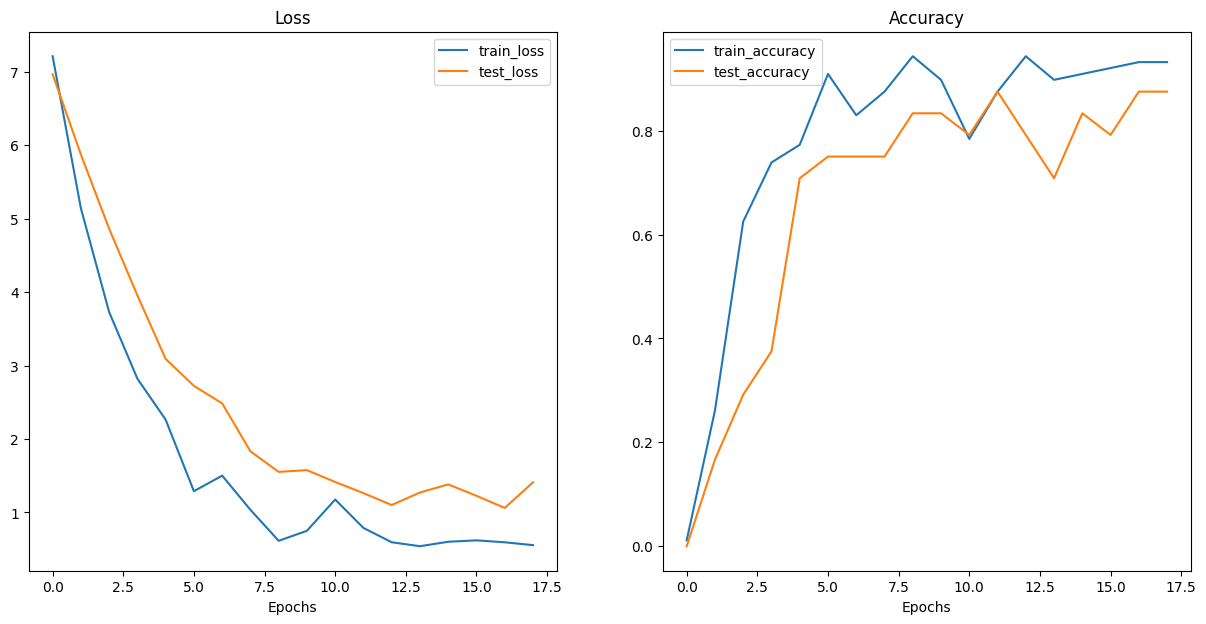

In [143]:
from scripts.helper_functions import plot_loss_curves

plot_loss_curves(results)